In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


In [16]:
df = pd.read_csv('../../data/diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Split into train and validation sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Scale the data

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4. Train KNN model on the training data

In [19]:
model = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

# 5. Evaluate on test set (baseline)

In [23]:
y_pred_test = model.predict(X_test_scaled)
baseline_f1 = f1_score(y_test, y_pred_test)
print(f"Test F1-score (baseline): {baseline_f1:.4f}")

Test F1-score (baseline): 0.6154


# 6. Permutation Feature Importance (on test set)

In [21]:
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
feature_importance = {}
for feature in X.columns:
    X_permuted = X_test_df.copy()
    X_permuted[feature] = np.random.permutation(X_permuted[feature])

    y_pred_perm = model.predict(X_permuted)
    permuted_f1 = f1_score(y_test, y_pred_perm)

    importance = baseline_f1 - permuted_f1
    feature_importance[feature] = importance
    print(f"{feature}: ΔF1 = {importance:.4f}")

Pregnancies: ΔF1 = 0.0447
Glucose: ΔF1 = 0.0745
BloodPressure: ΔF1 = 0.0678
SkinThickness: ΔF1 = -0.0248
Insulin: ΔF1 = 0.0253
BMI: ΔF1 = 0.0284
DiabetesPedigreeFunction: ΔF1 = 0.0502
Age: ΔF1 = 0.0745


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted w

# 7. Plot Feature Importances

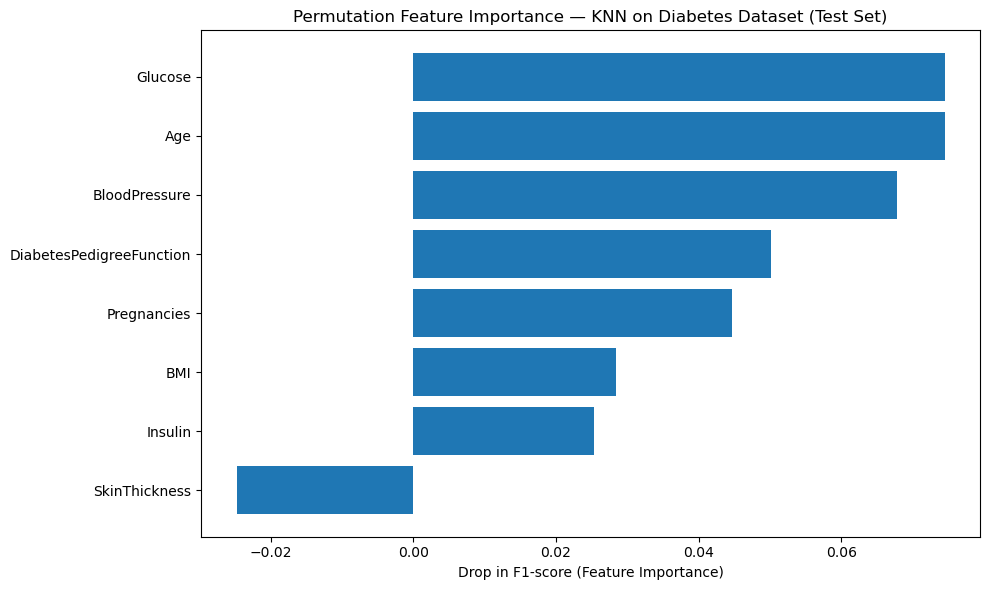

In [24]:
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
features, scores = zip(*sorted_importance)

plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel("Drop in F1-score (Feature Importance)")
plt.title("Permutation Feature Importance — KNN on Diabetes Dataset (Test Set)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()